- Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.

Dataset: https://www.kaggle.com/rishikeshkanabar/premier-league-player-statistics-updated-daily

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import numpy as np

In [2]:
premier_df = pd.read_csv('C:\\Users\\elgab\\Desktop\\NUBE MEGA\\PROGRAMACIÓN\\2020-2021\\IT_Academy\\itinerario DS\\bases_datos\\premier_league.csv', sep=',')
#premier_df = pd.read_csv('C:\\Users\\formacio\\Gabriel De Santis\\Datasets\\premier_league.csv', sep=',')
premier_df.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


De todos los atributos, seleccionaremos solo unos pocos. Hemos seleccionado solo los atributos que no contienen ningún valor nulo

In [3]:
premier_df.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [4]:
null = premier_df.isna().sum() / len(premier_df) * 100
null.sort_values()

Name                       0.000000
Fouls                      0.000000
Assists                    0.000000
Passes                     0.000000
Passes per match           0.000000
Yellow cards               0.000000
Goals                      0.000000
Losses                     0.000000
Red cards                  0.000000
Appearances                0.000000
Position                   0.000000
Club                       0.000000
Wins                       0.000000
Age                        0.175131
Nationality                0.175131
Jersey Number              1.401051
Blocked shots             12.084063
Crosses                   12.084063
Big chances created       12.084063
Clearances                12.084063
Interceptions             12.084063
Tackles                   12.084063
Headed Clearance          12.084063
Offsides                  12.084063
Goals with right foot     12.084063
Headed goals              12.084063
Hit woodwork              12.084063
Goals with left foot      12

In [5]:
null = premier_df.isna().sum() / len(premier_df) *100
not_null = list(null[null == 0].index)
not_null

['Name',
 'Club',
 'Position',
 'Appearances',
 'Wins',
 'Losses',
 'Goals',
 'Assists',
 'Passes',
 'Passes per match',
 'Yellow cards',
 'Red cards',
 'Fouls']

In [6]:
premier = premier_df[not_null].copy(deep=True)
premier = premier[premier.Appearances > 10]
premier

,Name,Club,Position,Appearances,Wins,Losses,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls
0,Bernd Leno,Arsenal,Goalkeeper,64,28,16,0,0,1783,27.86,2,0,0
3,Héctor Bellerín,Arsenal,Defender,160,90,37,7,18,7125,44.53,23,0,125
4,Kieran Tierney,Arsenal,Defender,16,7,5,1,1,519,32.44,2,0,9
6,Sokratis,Arsenal,Defender,44,21,11,3,2,2416,54.91,18,0,56
7,Rob Holding,Arsenal,Defender,41,25,9,0,0,2200,53.66,8,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,João Moutinho,Wolverhampton-Wanderers,Midfielder,78,32,23,2,14,3778,48.44,11,0,95
563,Leander Dendoncker,Wolverhampton-Wanderers,Midfielder,59,26,15,6,0,1966,33.32,6,0,43
566,Pedro Neto,Wolverhampton-Wanderers,Forward,31,14,7,3,4,399,12.87,3,0,16
567,Raúl Jiménez,Wolverhampton-Wanderers,Forward,78,32,23,32,13,2108,27.03,7,0,81


In [7]:
premier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 568
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              397 non-null    object 
 1   Club              397 non-null    object 
 2   Position          397 non-null    object 
 3   Appearances       397 non-null    int64  
 4   Wins              397 non-null    int64  
 5   Losses            397 non-null    int64  
 6   Goals             397 non-null    int64  
 7   Assists           397 non-null    int64  
 8   Passes            397 non-null    int64  
 9   Passes per match  397 non-null    float64
 10  Yellow cards      397 non-null    int64  
 11  Red cards         397 non-null    int64  
 12  Fouls             397 non-null    int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 43.4+ KB


Atributos categóricos a dummy variables.

In [8]:
dummies = pd.get_dummies(premier_df.Position)
dummies

,Defender,Forward,Goalkeeper,Midfielder
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
566,0,1,0,0
567,0,1,0,0
568,0,1,0,0
569,0,1,0,0


Ahora, tomaremos los atributos numéricos para aplicarles la estandarización.

In [9]:
attributes = []

for column in premier:
    if premier[column].dtype == 'int64' or premier[column].dtype == 'float64':
        attributes.append(column)

premier[attributes]

,Appearances,Wins,Losses,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls
0,64,28,16,0,0,1783,27.86,2,0,0
3,160,90,37,7,18,7125,44.53,23,0,125
4,16,7,5,1,1,519,32.44,2,0,9
6,44,21,11,3,2,2416,54.91,18,0,56
7,41,25,9,0,0,2200,53.66,8,0,32
...,...,...,...,...,...,...,...,...,...,...
562,78,32,23,2,14,3778,48.44,11,0,95
563,59,26,15,6,0,1966,33.32,6,0,43
566,31,14,7,3,4,399,12.87,3,0,16
567,78,32,23,32,13,2108,27.03,7,0,81


In [10]:
scaler = StandardScaler()
vars_estandar = pd.DataFrame(scaler.fit_transform(premier_df[attributes].values))
vars_estandar.columns = attributes

In [11]:
vars_estandar

,Appearances,Wins,Losses,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls
0,-0.059016,-0.024604,-0.277432,-0.436270,-0.541920,-0.168573,0.105873,-0.512501,-0.431559,-0.702062
1,-0.842122,-0.743747,-0.839557,-0.436270,-0.541920,-0.739227,-1.395962,-0.685711,-0.431559,-0.702062
2,-0.842122,-0.743747,-0.839557,-0.436270,-0.541920,-0.739227,-1.395962,-0.685711,-0.431559,-0.702062
3,1.115643,1.567784,0.460357,-0.019499,1.303625,1.541148,1.004494,1.306203,-0.431559,0.952705
4,-0.646345,-0.563961,-0.663893,-0.376732,-0.439390,-0.573119,0.352765,-0.512501,-0.431559,-0.582919
...,...,...,...,...,...,...,...,...,...,...
566,-0.462805,-0.384176,-0.593628,-0.257654,-0.131799,-0.611526,-0.702185,-0.425896,-0.431559,-0.490252
567,0.112289,0.078131,-0.031503,1.468972,0.790974,-0.064556,0.061131,-0.079476,-0.431559,0.370227
568,0.442661,-0.050288,0.811685,-0.138576,0.688443,-0.280271,-0.659599,-0.339291,-0.431559,0.356989
569,-0.829886,-0.743747,-0.804425,-0.436270,-0.541920,-0.738907,-1.342056,-0.685711,-0.431559,-0.702062


Text(0.5, 0, 'Variables')

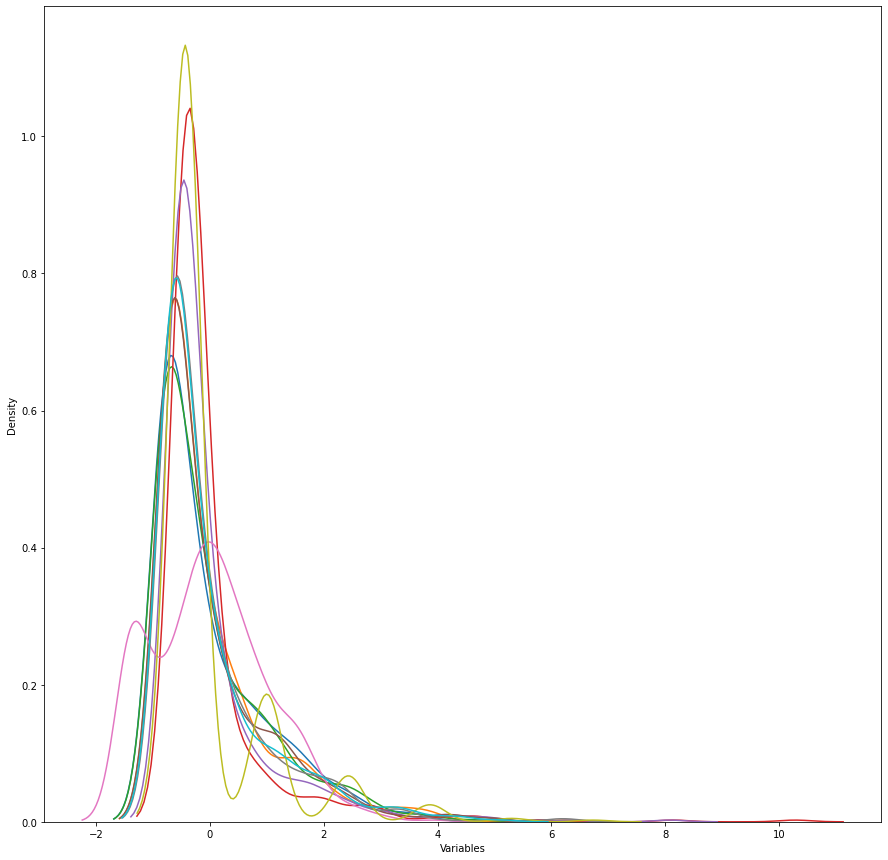

In [12]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(15,15))

for column in vars_estandar:
    sns.kdeplot(vars_estandar[column])

plt.xlabel('Variables')

Como podemos observar, todas las variables han sido transformadas a una misma escala.

In [13]:
norm_df = pd.concat([dummies, vars_estandar], axis=1)
norm_df

,Defender,Forward,Goalkeeper,Midfielder,Appearances,Wins,Losses,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls
0,0,0,1,0,-0.059016,-0.024604,-0.277432,-0.436270,-0.541920,-0.168573,0.105873,-0.512501,-0.431559,-0.702062
1,0,0,1,0,-0.842122,-0.743747,-0.839557,-0.436270,-0.541920,-0.739227,-1.395962,-0.685711,-0.431559,-0.702062
2,0,0,1,0,-0.842122,-0.743747,-0.839557,-0.436270,-0.541920,-0.739227,-1.395962,-0.685711,-0.431559,-0.702062
3,1,0,0,0,1.115643,1.567784,0.460357,-0.019499,1.303625,1.541148,1.004494,1.306203,-0.431559,0.952705
4,1,0,0,0,-0.646345,-0.563961,-0.663893,-0.376732,-0.439390,-0.573119,0.352765,-0.512501,-0.431559,-0.582919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0,1,0,0,-0.462805,-0.384176,-0.593628,-0.257654,-0.131799,-0.611526,-0.702185,-0.425896,-0.431559,-0.490252
567,0,1,0,0,0.112289,0.078131,-0.031503,1.468972,0.790974,-0.064556,0.061131,-0.079476,-0.431559,0.370227
568,0,1,0,0,0.442661,-0.050288,0.811685,-0.138576,0.688443,-0.280271,-0.659599,-0.339291,-0.431559,0.356989
569,0,1,0,0,-0.829886,-0.743747,-0.804425,-0.436270,-0.541920,-0.738907,-1.342056,-0.685711,-0.431559,-0.702062


In [14]:
round(norm_df.describe(), 3)

,Defender,Forward,Goalkeeper,Midfielder,Appearances,Wins,Losses,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls
count,571.000,571.000,571.000,571.000,571.000,571.000,571.000,571.000,571.000,571.000,571.000,571.000,571.000,571.000
mean,0.340,0.193,0.121,0.347,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000
std,0.474,0.395,0.326,0.476,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,0.000,0.000,0.000,0.000,-0.842,-0.744,-0.840,-0.436,-0.542,-0.739,-1.396,-0.686,-0.432,-0.702
25%,0.000,0.000,0.000,0.000,-0.805,-0.718,-0.804,-0.436,-0.542,-0.710,-0.789,-0.686,-0.432,-0.689
50%,0.000,0.000,0.000,0.000,-0.402,-0.436,-0.348,-0.377,-0.439,-0.419,-0.048,-0.426,-0.432,-0.411
75%,1.000,0.000,0.000,1.000,0.479,0.309,0.425,-0.079,0.073,0.312,0.651,0.267,-0.432,0.278
max,1.000,1.000,1.000,1.000,5.753,6.242,4.711,10.281,8.071,5.000,3.914,6.329,6.732,5.096


---

- Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

In [15]:
pca = PCA()
pca.fit(vars_estandar)

PCA()

Antes que nada, observaremos la influencia de cada variable en cada componente principal para descubrir si alguna variable presenta un mayor peso que otras sobre los valores.

In [16]:
componentes = pd.DataFrame(data = pca.components_, columns=vars_estandar.columns, 
             index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
componentes

,Appearances,Wins,Losses,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls
PC1,0.373291,0.357598,0.335886,0.245416,0.302770,0.358205,0.169229,0.345451,0.252743,0.357623
PC2,0.028259,0.058381,-0.007744,0.587304,0.367187,-0.223043,-0.643416,-0.188035,-0.129795,0.006740
PC3,-0.031132,0.148162,-0.232461,0.258789,0.352858,0.060657,0.599971,-0.196358,-0.557959,-0.134317
PC4,-0.248043,-0.091516,-0.388448,0.360503,0.089735,-0.127288,0.295636,-0.110079,0.724424,-0.026147
PC5,0.203121,0.474032,-0.167583,-0.335063,0.189690,0.309252,-0.185479,-0.402417,0.235142,-0.458729
PC6,-0.267647,-0.053787,-0.517819,-0.358097,0.470417,0.158152,-0.216320,0.377505,-0.072010,0.297167
PC7,0.011356,0.430915,-0.475654,0.297826,-0.609197,0.196978,-0.129956,0.210978,-0.146899,0.079596
PC8,0.055266,0.166372,-0.068965,-0.180539,-0.080660,-0.139158,0.039863,-0.601633,-0.002759,0.736536
PC9,0.217354,0.425405,-0.076214,-0.189683,0.077051,-0.789458,0.101550,0.289217,0.033197,-0.075880
PC10,0.796268,-0.465244,-0.386212,0.011688,-0.010235,-0.000674,0.005019,-0.007897,-0.000993,0.004071


<AxesSubplot:>

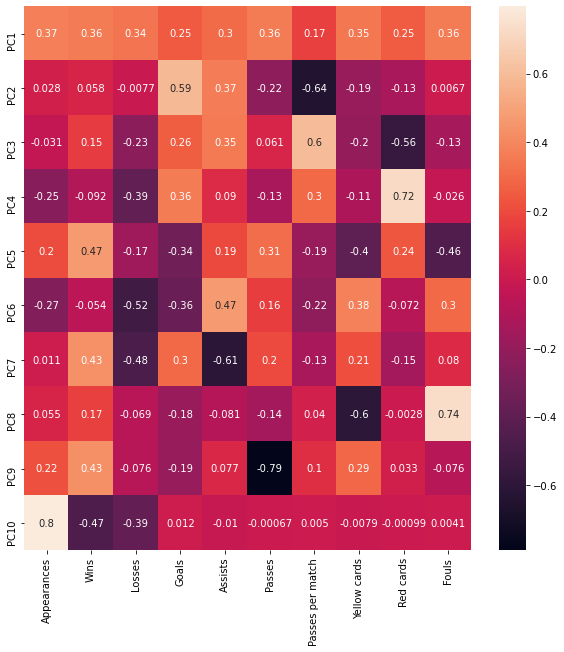

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(componentes, annot=True)

Los pesos asignados a cada variable en el PC1 son equitativos por lo general, por tanto no podemos concluir que x variable en concreto tenga mayor peso sobre las otras. 

Ahora, nos dispondremos a observar el porcentaje de varianza que logra recoger cada componente.

In [18]:
pca.explained_variance_ratio_

array([6.65483865e-01, 1.11013319e-01, 7.58386368e-02, 5.63826210e-02,
       3.37591072e-02, 2.58017062e-02, 1.92109432e-02, 7.26898042e-03,
       5.03108165e-03, 2.09739716e-04])

In [19]:
pca.n_components_

10

Text(0, 0.5, 'Por. varianza explicada')

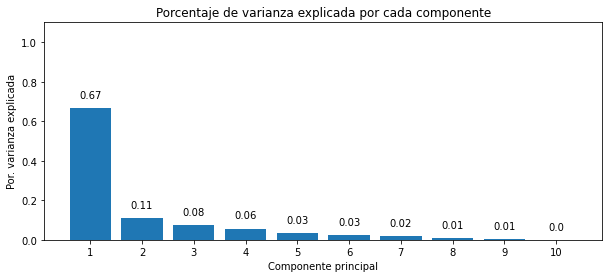

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_)

for x, y in zip(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center')

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')

Seguidamente, nos proponemos echar un vistazo al porcentaje de varianza acumulada, que ayuda a saber cuál sería el número de componentes óptimo que deberíamos utilizar para una investigación en función del grado de varianza necesitemos mantener.

In [21]:
var_acumulada = pca.explained_variance_ratio_.cumsum()
var_acumulada

array([0.66548387, 0.77649718, 0.85233582, 0.90871844, 0.94247755,
       0.96827926, 0.9874902 , 0.99475918, 0.99979026, 1.        ])

Text(0, 0.5, 'Por. varianza acumulada')

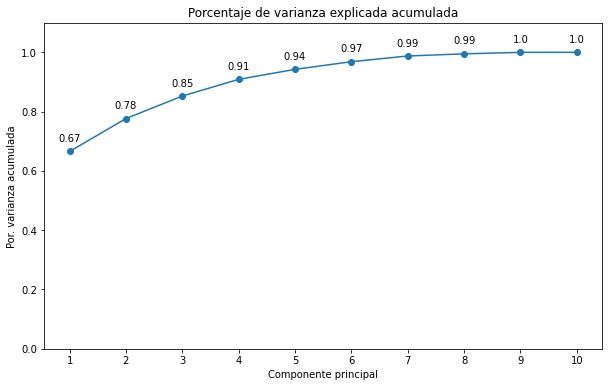

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.plot(
        np.arange(pca.n_components_) + 1,
        var_acumulada,
        marker='o')

for x, y in zip(np.arange(pca.n_components_) + 1, var_acumulada):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center')
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')

Con dos componentes seríamos capaces de recoger un 78% de varianza sobre los datos, con 4 obtendríamos un 91%, con 6 un 97% y con 7 un 99%. En función del tipo de modelo que queramos entrenar escogeríamos x cantidad de componentes u otra.

Dicho esto, transformaremos nuestro data set con base a diferentes números de componentes. 

En primer lugar, tomaremos todos los componentes y reconstruiremos el dataset de nuevo para comprobar que nuestro PCA funciona correctamente.

In [23]:
proyecciones = pd.DataFrame(data=pca.transform(X=vars_estandar), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
proyecciones

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.974817,-0.339036,0.247581,-0.266350,0.421273,-0.358510,0.173316,-0.045633,0.073402,0.074312
1,-2.231519,0.727357,-0.605577,-0.140229,0.187298,0.350085,0.168133,-0.046037,-0.111994,-0.003359
2,-2.231519,0.727357,-0.605577,-0.140229,0.187298,0.350085,0.168133,-0.046037,-0.111994,-0.003359
3,2.926540,-0.586514,1.097981,-0.869609,0.372601,0.832654,0.257150,-0.068271,0.154984,-0.034422
4,-1.531608,-0.379333,0.434964,0.230845,-0.114989,-0.027257,-0.028967,-0.006302,0.077763,0.008473
...,...,...,...,...,...,...,...,...,...,...
566,-1.382077,0.490361,-0.085816,-0.106847,0.120622,0.261983,0.020428,-0.037962,0.131102,0.036506
567,0.642360,1.209666,0.914090,0.290508,-0.547665,-0.084231,0.061003,0.025482,-0.165882,0.077217
568,0.283691,0.783817,-0.156131,-0.852617,0.014039,-0.055161,-0.812653,0.410572,0.107028,0.055164
569,-2.205913,0.692676,-0.581763,-0.141015,0.173997,0.317007,0.144618,-0.045680,-0.106790,-0.006914


In [24]:
reconstruccion = pca.inverse_transform(X=proyecciones)
reconstruccion = pd.DataFrame(
                    reconstruccion,
                    columns = vars_estandar.columns)
reconstruccion

,Appearances,Wins,Losses,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls
0,-0.059016,-0.024604,-0.277432,-0.436270,-0.541920,-0.168573,0.105873,-0.512501,-0.431559,-0.702062
1,-0.842122,-0.743747,-0.839557,-0.436270,-0.541920,-0.739227,-1.395962,-0.685711,-0.431559,-0.702062
2,-0.842122,-0.743747,-0.839557,-0.436270,-0.541920,-0.739227,-1.395962,-0.685711,-0.431559,-0.702062
3,1.115643,1.567784,0.460357,-0.019499,1.303625,1.541148,1.004494,1.306203,-0.431559,0.952705
4,-0.646345,-0.563961,-0.663893,-0.376732,-0.439390,-0.573119,0.352765,-0.512501,-0.431559,-0.582919
...,...,...,...,...,...,...,...,...,...,...
566,-0.462805,-0.384176,-0.593628,-0.257654,-0.131799,-0.611526,-0.702185,-0.425896,-0.431559,-0.490252
567,0.112289,0.078131,-0.031503,1.468972,0.790974,-0.064556,0.061131,-0.079476,-0.431559,0.370227
568,0.442661,-0.050288,0.811685,-0.138576,0.688443,-0.280271,-0.659599,-0.339291,-0.431559,0.356989
569,-0.829886,-0.743747,-0.804425,-0.436270,-0.541920,-0.738907,-1.342056,-0.685711,-0.431559,-0.702062


In [25]:
vars_estandar

,Appearances,Wins,Losses,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls
0,-0.059016,-0.024604,-0.277432,-0.436270,-0.541920,-0.168573,0.105873,-0.512501,-0.431559,-0.702062
1,-0.842122,-0.743747,-0.839557,-0.436270,-0.541920,-0.739227,-1.395962,-0.685711,-0.431559,-0.702062
2,-0.842122,-0.743747,-0.839557,-0.436270,-0.541920,-0.739227,-1.395962,-0.685711,-0.431559,-0.702062
3,1.115643,1.567784,0.460357,-0.019499,1.303625,1.541148,1.004494,1.306203,-0.431559,0.952705
4,-0.646345,-0.563961,-0.663893,-0.376732,-0.439390,-0.573119,0.352765,-0.512501,-0.431559,-0.582919
...,...,...,...,...,...,...,...,...,...,...
566,-0.462805,-0.384176,-0.593628,-0.257654,-0.131799,-0.611526,-0.702185,-0.425896,-0.431559,-0.490252
567,0.112289,0.078131,-0.031503,1.468972,0.790974,-0.064556,0.061131,-0.079476,-0.431559,0.370227
568,0.442661,-0.050288,0.811685,-0.138576,0.688443,-0.280271,-0.659599,-0.339291,-0.431559,0.356989
569,-0.829886,-0.743747,-0.804425,-0.436270,-0.541920,-0.738907,-1.342056,-0.685711,-0.431559,-0.702062


Como podemos observar, la reconstrucción es bastante acertada.

Finalmente, reduciremos las dimensiones de nuestro dataframe a 2 componentes (78% de varianza) y 4  componentes (91% de varianza).

In [26]:
two_components = PCA(n_components=2)
four_components = PCA(n_components=4)

pc2 = two_components.fit_transform(vars_estandar)
pc4 = four_components.fit_transform(vars_estandar)

In [27]:
pc2_df = pd.DataFrame(data=pc2, columns=['PC1', 'PC2'])
pc2_df

,PC1,PC2
0,-0.974817,-0.339036
1,-2.231519,0.727357
2,-2.231519,0.727357
3,2.926540,-0.586514
4,-1.531608,-0.379333
...,...,...
566,-1.382077,0.490361
567,0.642360,1.209666
568,0.283691,0.783817
569,-2.205913,0.692676


In [28]:
pd.DataFrame(data=pc4, columns=['PC1', 'PC2', 'PC3', 'PC4'])

,PC1,PC2,PC3,PC4
0,-0.974817,-0.339036,0.247581,-0.266350
1,-2.231519,0.727357,-0.605577,-0.140229
2,-2.231519,0.727357,-0.605577,-0.140229
3,2.926540,-0.586514,1.097981,-0.869609
4,-1.531608,-0.379333,0.434964,0.230845
...,...,...,...,...
566,-1.382077,0.490361,-0.085816,-0.106847
567,0.642360,1.209666,0.914090,0.290508
568,0.283691,0.783817,-0.156131,-0.852617
569,-2.205913,0.692676,-0.581763,-0.141015


Text(0, 0.5, 'P. Component 2')

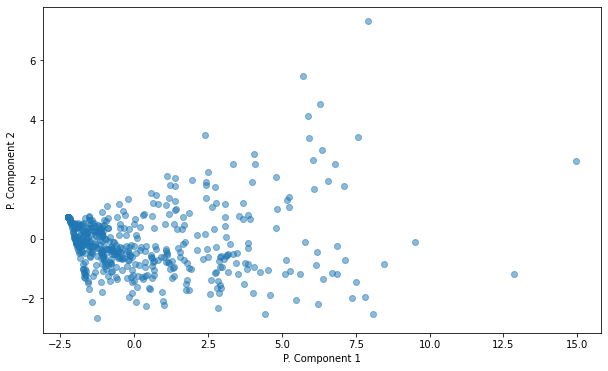

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.scatter(pc2_df.PC1, pc2_df.PC2, alpha=0.5)
ax.set_xlabel('P. Component 1')
ax.set_ylabel('P. Component 2')

Este gráfico intenta resumir el data set. Como ya sabemos, solo consigue mantener un 78% de la varianza, por lo cual no es del todo preciso. A primera vista, no se aprecian clusters muy pronunciados. Como mucho, nos atreveríamos a diferenciar entre una concentración muy alta (a la izquierda de la gráfica) y una dispersión por el resto de la gráfica que podríamos considerar outliers (jugadores de fútbol que destacan de la media de jugadores). Sin embargo, sería necesario aplicar un algoritmo de clasificación para obtener resultados menos vagos o generales.

----

- Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

Antes que nada, vamos a transformar ciertas variables en índices por aparición para que no haya un desajuste entre aquellos jugadores que han jugado más partidos en su trayectoria profesional (y, por ende, hayan acumulado más victorias, goles, etc.) y los que han tenido menos apariciones.

In [60]:
premier

,Name,Club,Position,Appearances,Wins,Losses,Goals,Assists,Passes,Yellow cards,Red cards,Fouls
0,Bernd Leno,Arsenal,Goalkeeper,64,0.437500,0.250000,0.000000,0.000000,27.859375,0.031250,0.0,0.000000
3,Héctor Bellerín,Arsenal,Defender,160,0.562500,0.231250,0.043750,0.112500,44.531250,0.143750,0.0,0.781250
4,Kieran Tierney,Arsenal,Defender,16,0.437500,0.312500,0.062500,0.062500,32.437500,0.125000,0.0,0.562500
6,Sokratis,Arsenal,Defender,44,0.477273,0.250000,0.068182,0.045455,54.909091,0.409091,0.0,1.272727
7,Rob Holding,Arsenal,Defender,41,0.609756,0.219512,0.000000,0.000000,53.658537,0.195122,0.0,0.780488
...,...,...,...,...,...,...,...,...,...,...,...,...
562,João Moutinho,Wolverhampton-Wanderers,Midfielder,78,0.410256,0.294872,0.025641,0.179487,48.435897,0.141026,0.0,1.217949
563,Leander Dendoncker,Wolverhampton-Wanderers,Midfielder,59,0.440678,0.254237,0.101695,0.000000,33.322034,0.101695,0.0,0.728814
566,Pedro Neto,Wolverhampton-Wanderers,Forward,31,0.451613,0.225806,0.096774,0.129032,12.870968,0.096774,0.0,0.516129
567,Raúl Jiménez,Wolverhampton-Wanderers,Forward,78,0.410256,0.294872,0.410256,0.166667,27.025641,0.089744,0.0,1.038462


In [31]:
#variables a transformar en indices
variables_a_transformar = [x for x in attributes if x != 'Appearances' and x != 'Passes per match'] 

def indice_var(variable, divisor):
    return variable / divisor

for column in premier[variables_a_transformar]:
    premier[column] = indice_var(premier[column], premier.Appearances)

premier

,Name,Club,Position,Appearances,Wins,Losses,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls
0,Bernd Leno,Arsenal,Goalkeeper,64,0.437500,0.250000,0.000000,0.000000,27.859375,27.86,0.031250,0.0,0.000000
3,Héctor Bellerín,Arsenal,Defender,160,0.562500,0.231250,0.043750,0.112500,44.531250,44.53,0.143750,0.0,0.781250
4,Kieran Tierney,Arsenal,Defender,16,0.437500,0.312500,0.062500,0.062500,32.437500,32.44,0.125000,0.0,0.562500
6,Sokratis,Arsenal,Defender,44,0.477273,0.250000,0.068182,0.045455,54.909091,54.91,0.409091,0.0,1.272727
7,Rob Holding,Arsenal,Defender,41,0.609756,0.219512,0.000000,0.000000,53.658537,53.66,0.195122,0.0,0.780488
...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,João Moutinho,Wolverhampton-Wanderers,Midfielder,78,0.410256,0.294872,0.025641,0.179487,48.435897,48.44,0.141026,0.0,1.217949
563,Leander Dendoncker,Wolverhampton-Wanderers,Midfielder,59,0.440678,0.254237,0.101695,0.000000,33.322034,33.32,0.101695,0.0,0.728814
566,Pedro Neto,Wolverhampton-Wanderers,Forward,31,0.451613,0.225806,0.096774,0.129032,12.870968,12.87,0.096774,0.0,0.516129
567,Raúl Jiménez,Wolverhampton-Wanderers,Forward,78,0.410256,0.294872,0.410256,0.166667,27.025641,27.03,0.089744,0.0,1.038462


In [32]:
premier = premier.drop(columns='Passes per match')

In [33]:
attributes.remove('Passes per match')

Ahora, vamos a realizar un poco de exploración visual para detectar outliers

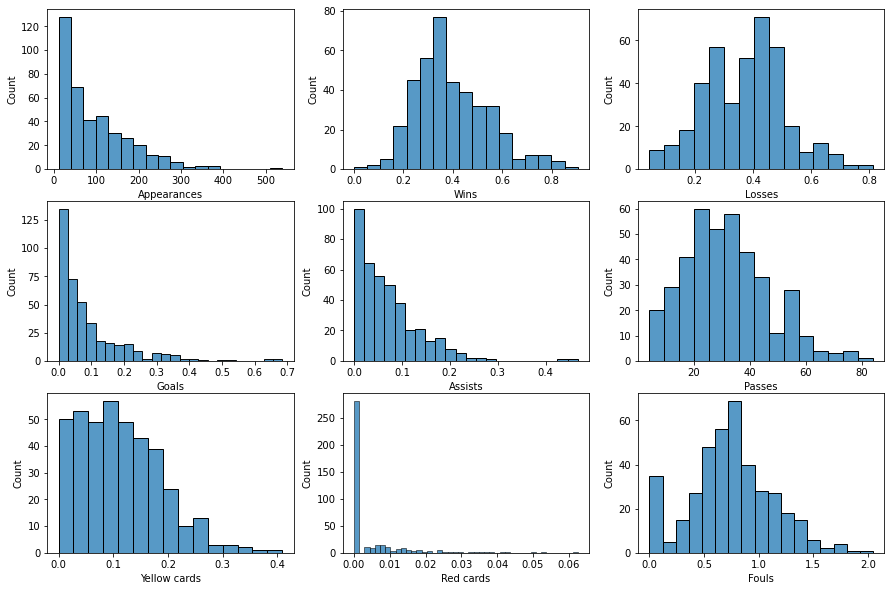

In [54]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

count = 0

for i in range(0, 3):
    sns.histplot(premier[attributes].iloc[:, count], ax=axs[i, 0])
    count += 1
    sns.histplot(premier[attributes].iloc[:, count], ax=axs[i, 1])
    count += 1
    sns.histplot(premier[attributes].iloc[:, count], ax=axs[i, 2])
    count += 1

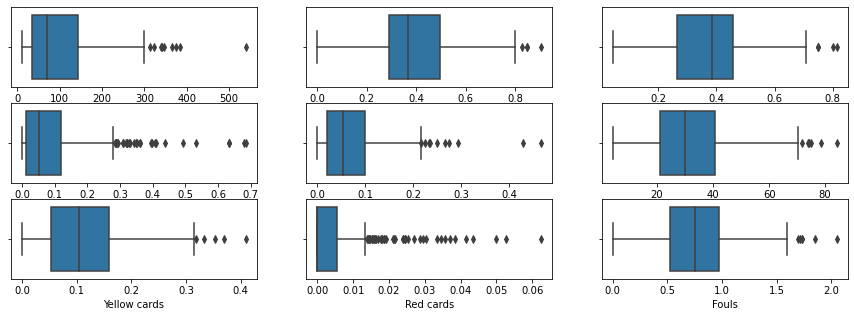

In [56]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,5))

count = 0

for i in range(0, 3):
    sns.boxplot(x=premier[attributes].iloc[:, count], ax=axs[i, 0])
    count += 1
    sns.boxplot(x=premier[attributes].iloc[:, count], ax=axs[i, 1])
    count += 1
    sns.boxplot(x=premier[attributes].iloc[:, count], ax=axs[i, 2])
    count += 1

In [36]:
premier.skew()

<ipython-input-36-9c43aab00f9b>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  premier.skew()


Appearances     1.410961
Wins            0.690721
Losses          0.182518
Goals           2.297254
Assists         1.653321
Passes          0.609846
Yellow cards    0.655567
Red cards       3.057104
Fouls           0.116983
dtype: float64

Aplicaremos dos tipos de transformaciones distintas para ver cuál gestiona mejor los outliers y el skew

In [37]:
premier_log = pd.DataFrame(data=np.ma.log(premier[attributes].values).filled(0), columns=attributes)
premier_log.skew()

Appearances    -0.093389
Wins           -0.360522
Losses         -1.277633
Goals           0.156081
Assists         0.441561
Passes         -0.716210
Yellow cards    0.370253
Red cards      -1.027136
Fouls          -3.144816
dtype: float64

In [38]:
premier_sqrt = np.sqrt(premier[attributes])
premier_sqrt.skew()

Appearances     0.605330
Wins           -0.094329
Losses         -0.457356
Goals           0.509603
Assists        -0.045150
Passes         -0.006862
Yellow cards   -0.612076
Red cards       1.517515
Fouls          -1.246453
dtype: float64

Obtenemos mejores resultados con square root transformation que con log transformation.

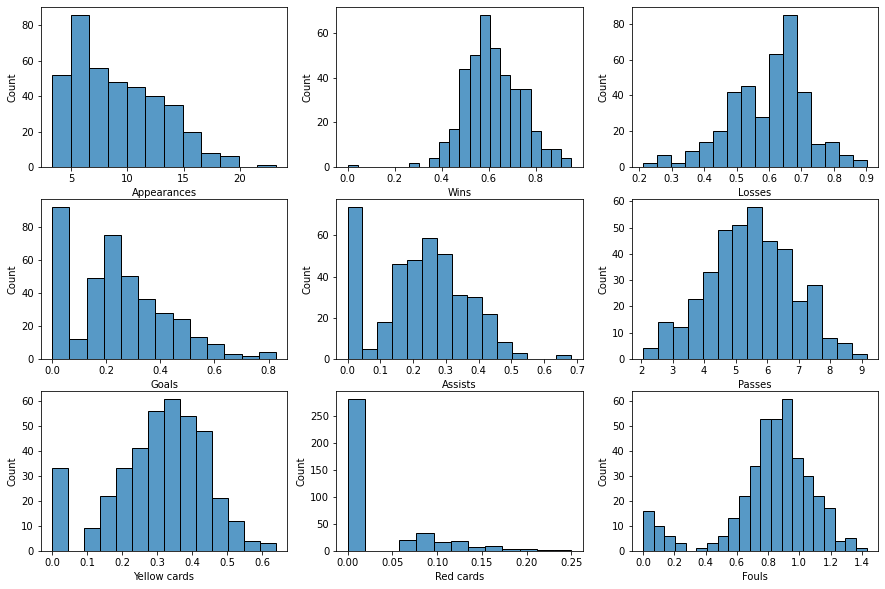

In [57]:

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

count = 0

for i in range(0, 3):
    sns.histplot(premier_sqrt.iloc[:, count], ax=axs[i, 0])
    count += 1
    sns.histplot(premier_sqrt.iloc[:, count], ax=axs[i, 1])
    count += 1
    sns.histplot(premier_sqrt.iloc[:, count], ax=axs[i, 2])
    count += 1

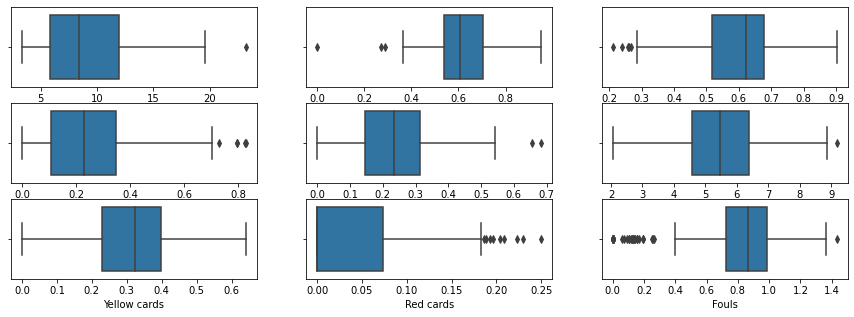

In [59]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,5))

count = 0

for i in range(0, 3):
    sns.boxplot(x=premier_sqrt.iloc[:, count], ax=axs[i, 0])
    count += 1
    sns.boxplot(x=premier_sqrt.iloc[:, count], ax=axs[i, 1])
    count += 1
    sns.boxplot(x=premier_sqrt.iloc[:, count], ax=axs[i, 2])
    count += 1

Finalmente, procedemos a normalizar el data set para que todos los valores se mantengan entre 0 y 1, de forma que, de cara a aplicar un modelo de machine learning, no haya ninguna variable con más peso sobre las otras por culpa de un problema de escalas.

In [49]:
scaler = MinMaxScaler()
normalized = scaler.fit_transform(premier_sqrt)

In [50]:
premier_normal = pd.DataFrame(data=normalized, columns=attributes)
premier_normal

,Appearances,Wins,Losses,Goals,Assists,Passes,Yellow cards,Red cards,Fouls
0,0.235348,0.695379,0.418758,0.000000,0.000000,0.453212,0.276385,0.0,0.000000
1,0.468975,0.788486,0.391077,0.252831,0.490990,0.649401,0.592781,0.0,0.617690
2,0.034341,0.695379,0.504219,0.302191,0.365963,0.511886,0.552771,0.0,0.524127
3,0.166667,0.726300,0.418758,0.315628,0.312094,0.753036,1.000000,0.0,0.788394
4,0.155102,0.820939,0.373174,0.000000,0.000000,0.741101,0.690626,0.0,0.617388
...,...,...,...,...,...,...,...,...,...
392,0.277146,0.673380,0.481056,0.193557,0.620174,0.689682,0.587137,0.0,0.771241
393,0.219325,0.697901,0.424868,0.385471,0.000000,0.522734,0.498586,0.0,0.596601
394,0.113124,0.706506,0.382833,0.376029,0.525830,0.215450,0.486373,0.0,0.502059
395,0.277146,0.673380,0.481056,0.774229,0.597614,0.442021,0.468373,0.0,0.712149


In [51]:
premier_normal.describe()

,Appearances,Wins,Losses,Goals,Assists,Passes,Yellow cards,Red cards,Fouls
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,0.291146,0.649632,0.561749,0.287072,0.324631,0.480093,0.479048,0.130503,0.570007
std,0.196591,0.126858,0.173846,0.220353,0.206146,0.190143,0.211825,0.222532,0.199409
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.126350,0.565065,0.442503,0.130344,0.211289,0.355239,0.360041,0.000000,0.506989
50%,0.253771,0.637453,0.594146,0.277310,0.341262,0.481203,0.505781,0.000000,0.605210
75%,0.434259,0.739107,0.673799,0.418728,0.460360,0.608628,0.623610,0.295689,0.689580
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


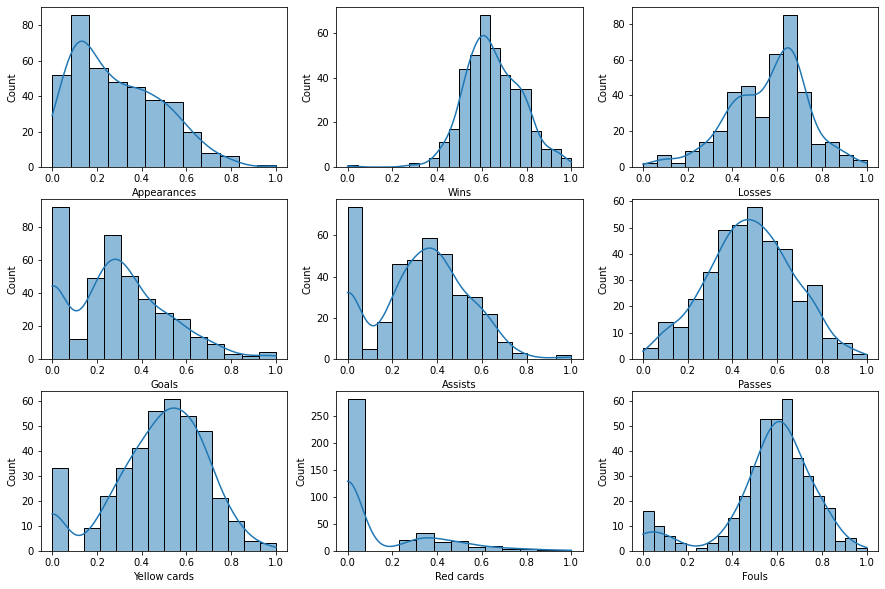

In [58]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

count = 0

for i in range(0, 3):
    sns.histplot(premier_normal.iloc[:, count], ax=axs[i, 0], kde=True)
    count += 1
    sns.histplot(premier_normal.iloc[:, count], ax=axs[i, 1], kde=True)
    count += 1
    sns.histplot(premier_normal.iloc[:, count], ax=axs[i, 2], kde=True)
    count += 1